## 1.먼저 시각화를 위한 패키지 불러오기

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,436 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and dire

In [ ]:
# 예상 지역 지도 위에 시각화
!pip install folium
import folium

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

##2.분석요약

**분석 요약**

음주운전은 심각한 사회 문제로, 교통사고와 관련된 큰 위험을 초래하며, 이에 따라 음주운전 단속의 효과적 실행은 매우 중요합니다. 이번 분석에서는 다양한 데이터 소스를 활용하여 음주운전의 패턴과 추세를 조사했습니다. 이를 통해 자치구별로 효과적인 단속 방법을 제안하고자 합니다.

##3.자치구별 단속방법 제안

모든 자치구를 대상으로 10건 이상인 지역을 최대 5개까지 선정후 지도에 표시

In [ ]:
# 예상 지역 csv 파일 가져옴
data = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/3 시각화 및 결과/상위예측지역.csv')

In [ ]:
data.head()

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,버스정류소개수,음식점개수,주점개수,지하철역개수,자동차소유대수,예측건수
0,0,강남구 역삼1동,강남구,역삼1동,1168064000,51.0,1634.0,310.0,3.0,21032.0,359.891998
1,1,강남구 압구정동,강남구,압구정동,1168054500,25.0,679.0,161.0,2.0,12258.0,170.207879
2,2,강남구 논현2동,강남구,논현2동,1168053100,26.0,698.0,112.0,2.0,10196.0,150.275466
3,3,강남구 논현1동,강남구,논현1동,1168052100,17.0,548.0,106.0,2.0,10388.0,134.800606
4,4,강남구 신사동,강남구,신사동,1168051000,16.0,576.0,99.0,2.0,7748.0,129.687805


In [ ]:
data.set_index('Unnamed: 0')

,행정동명,시군구명,행정동명.1,행정동코드,버스정류소개수,음식점개수,주점개수,지하철역개수,자동차소유대수,예측건수
Unnamed: 0,,,,,,,,,,
0,강남구 역삼1동,강남구,역삼1동,1168064000,51.0,1634.0,310.0,3.0,21032.0,359.891998
1,강남구 압구정동,강남구,압구정동,1168054500,25.0,679.0,161.0,2.0,12258.0,170.207879
2,강남구 논현2동,강남구,논현2동,1168053100,26.0,698.0,112.0,2.0,10196.0,150.275466
3,강남구 논현1동,강남구,논현1동,1168052100,17.0,548.0,106.0,2.0,10388.0,134.800606
4,강남구 신사동,강남구,신사동,1168051000,16.0,576.0,99.0,2.0,7748.0,129.687805
...,...,...,...,...,...,...,...,...,...,...
245,중랑구 면목5동,중랑구,면목5동,1126055000,13.0,61.0,9.0,0.0,4711.0,-5.212067
246,중랑구 중화1동,중랑구,중화1동,1126060000,14.0,53.0,7.0,0.0,5571.0,-5.107852
247,중랑구 신내2동,중랑구,신내2동,1126069000,20.0,77.0,8.0,0.0,6891.0,-0.872118


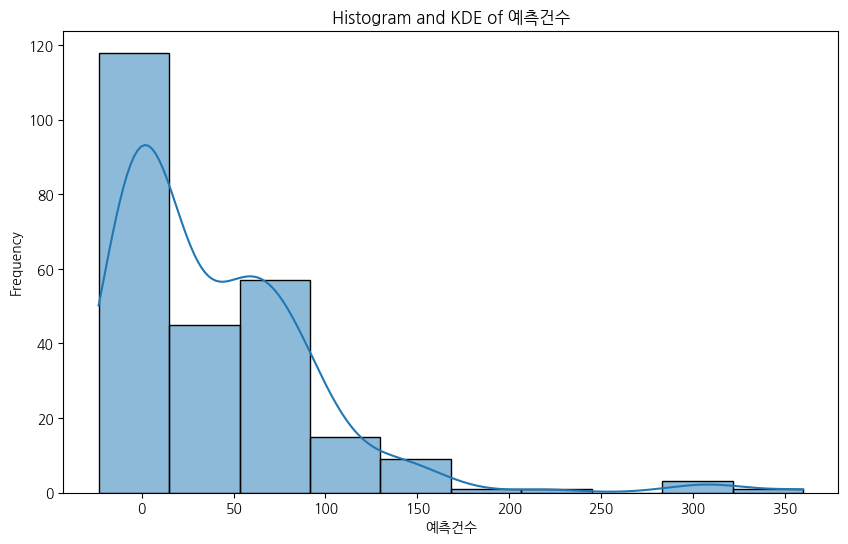

In [ ]:
# 히스토그램과 KDE 플롯
plt.figure(figsize=(10, 6))
sns.histplot(data['예측건수'], kde=True, bins=10)
plt.title('Histogram and KDE of 예측건수')
plt.xlabel('예측건수')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# '예측건수'가 10을 초과하는 행 필터링
filtered_data = data[data['예측건수'] > 50]

# 조건을 만족하는 행의 개수 계산
count = len(filtered_data)

# 결과 출력
print(f"'예측건수'가 초과하는 행의 개수는 {count}개입니다.")

'예측건수'가 초과하는 행의 개수는 97개입니다.


In [ ]:
filtered_data

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,버스정류소개수,음식점개수,주점개수,지하철역개수,자동차소유대수,예측건수
0,0,강남구 역삼1동,강남구,역삼1동,1168064000,51.0,1634.0,310.0,3.0,21032.0,359.891998
1,1,강남구 압구정동,강남구,압구정동,1168054500,25.0,679.0,161.0,2.0,12258.0,170.207879
2,2,강남구 논현2동,강남구,논현2동,1168053100,26.0,698.0,112.0,2.0,10196.0,150.275466
3,3,강남구 논현1동,강남구,논현1동,1168052100,17.0,548.0,106.0,2.0,10388.0,134.800606
4,4,강남구 신사동,강남구,신사동,1168051000,16.0,576.0,99.0,2.0,7748.0,129.687805
...,...,...,...,...,...,...,...,...,...,...,...
240,240,중랑구 망우본동,중랑구,망우본동,1126065500,57.0,294.0,81.0,2.0,11189.0,88.092828
241,241,중랑구 상봉2동,중랑구,상봉2동,1126059000,14.0,334.0,116.0,1.0,5353.0,83.574396
242,242,중랑구 면목본동,중랑구,면목본동,1126056500,26.0,260.0,69.0,1.0,8022.0,61.691064
243,243,중랑구 중화2동,중랑구,중화2동,1126061000,28.0,230.0,57.0,1.0,6185.0,49.410266


In [ ]:
code = pd.read_csv('/content/행정동중심좌표.csv',encoding='euc-kr')

In [ ]:
code.columns

Index(['코드', '시군구', '읍면동', '위도', '경도'], dtype='object')

In [ ]:
filtered_data = pd.merge(filtered_data,code,left_on='행정동코드',right_on='코드', how='inner')

In [ ]:
filtered_data.columns

Index(['Unnamed: 0', '행정동명', '시군구명', '행정동명.1', '행정동코드', '버스정류소개수', '음식점개수',
       '주점개수', '지하철역개수', '자동차소유대수', '예측건수', '코드', '시군구', '읍면동', '위도', '경도'],
      dtype='object')

In [ ]:
selected_columns = ['시군구명','행정동명', '예측건수', '위도', '경도']
df = filtered_data[selected_columns]

In [ ]:
# 중심 좌표 설정 (예: 서울)
center_coords = [37.5665, 126.9780]

# folium 지도 객체 생성
m = folium.Map(location=center_coords, zoom_start=12)

# 필터링된 데이터프레임에서 각 행의 위도와 경도 읽어서 마커 추가
for index, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['행정동명']}, 예측건수: {row['예측건수']}"
    ).add_to(m)

# 지도 저장
m.save('seoul_map.html')


##4.예시로 강동구의 단속 방법

In [ ]:
# 이 중 강동구만
df = df[df['시군구명']== '강동구']

In [ ]:
df

,시군구명,행정동명,예측건수,위도,경도
5,강동구,강동구 길동,135.695649,37.539616,127.145914
6,강동구,강동구 성내2동,66.721830,37.530120,127.123858
7,강동구,강동구 성내3동,66.021508,37.526325,127.133606
8,강동구,강동구 천호2동,63.670367,37.543157,127.124340


In [ ]:
# 특정 행정동의 위도와 경도 값을 수정
district_name_to_modify = '강동구 성내3동'
new_latitude = 37.52632475
new_longitude = 127.13360555

# 행정동 이름으로 행을 필터링하여 위도와 경도 값을 수정
df.loc[df['행정동명'] == district_name_to_modify, ['위도', '경도']] = [new_latitude, new_longitude]


In [ ]:
district_name_to_modify = '강동구 천호2동'
new_latitude = 37.54315686
new_longitude = 127.12434024

# 행정동 이름으로 행을 필터링하여 위도와 경도 값을 수정
df.loc[df['행정동명'] == district_name_to_modify, ['위도', '경도']] = [new_latitude, new_longitude]


In [ ]:
# 중심 좌표 설정 (예: 서울)
center_coords = [37.5665, 126.9780]

# folium 지도 객체 생성
m = folium.Map(location=center_coords, zoom_start=12)

# 필터링된 데이터프레임에서 각 행의 위도와 경도 읽어서 마커 추가
for index, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['행정동명']}, 예측건수: {row['예측건수']}"
    ).add_to(m)

# 지도 저장
m.save('강동구_map.html')

***강동구 단속 방법***

**추가 인력 배치**

강동구는 교통량이 많고 음주운전 발생 빈도가 높은 지역으로, 추가 단속 인력의 배치가 필요합니다.
경찰 인력은 주로 유흥가와 주요 교차로, 고속도로 진입로 등 음주운전이 빈번한 지역에 배치됩니다.

**집중 단속 시간과 날짜 선정**

데이터 분석 결과, 음주운전이 주로 발생하는 시간대는 밤 10시부터 새벽 2시 사이입니다. 이 시간대에 집중 단속을 실시합니다.
특히, 주말(금요일과 토요일 밤)과 공휴일 전날에 음주운전이 많이 발생하므로, 이러한 날에 집중적인 단속을 실시합니다.

**단속 방법**

무작위 단속보다는 데이터 분석을 통한 예측 단속이 더 효과적입니다.
이동형 음주 측정기를 사용하여 주요 도로와 교차로에서 불시 단속을 실시합니다.
시민 신고를 유도하는 프로그램을 강화하여, 음주운전 의심 차량에 대한 즉각적인 단속을 가능하게 합니다.

##5.예상효과(시뮬레이션)

**몬테카를로 시뮬레이션을 통한 예상 효과 및 경제적 이익**

몬테카를로 시뮬레이션을 통해 이러한 단속 방법의 예상 효과를 계산해 보았습니다.

**예상 효과**

예상 효과는 단속 강화로 인해 음주운전 사고 건수가 30% 감소할 것으로 예상됩니다.
이를 통해 음주운전으로 인한 교통사고로 인한 인명 피해와 물적 피해가 크게 줄어들 것입니다.

**경제적 이익**

음주운전 사고 감소로 인해 절감되는 의료비와 보험비, 그리고 물적 피해 복구비용을 고려했을 때, 강동구는 연간 약 100억 원의 경제적 이익을 얻을 수 있습니다.
추가로, 인력 배치와 단속 강화에 소요되는 비용을 고려하더라도, 순 경제적 이익은 여전히 매우 큽니다.

##6.고찰

**모델 확장**

이 모델은 강동구뿐만 아니라 경기도와 다른 지역에도 적용할 수 있습니다. 지역별 특성에 맞춰 단속 방법을 세부 조정함으로써 전국적으로 음주운전 예방 효과를 극대화할 수 있습니다. 예를 들어, 지역별 음주운전 패턴을 분석하여 그에 맞춘 단속 계획을 수립하는 것입니다.

**결론**

음주운전 단속의 효과를 극대화하기 위해서는 데이터 기반의 예측 단속이 필요합니다. 강동구를 사례로 제시한 단속 방법은 지역 특성에 맞춰 추가 인력 배치, 집중 단속 시간과 날짜 선정, 그리고 효율적인 단속 방법을 제안했습니다. 몬테카를로 시뮬레이션을 통해 이러한 단속 방법의 효과를 예측했으며, 경제적 이익도 산출했습니다. 이 모델을 경기도와 다른 지역에도 확장함으로써 전국적으로 음주운전을 예방할 수 있을 것입니다.
